In [1]:
import sys
from sklearn.preprocessing import MinMaxScaler
sys.path.append("./../src/")

# Modules of src folder
import data_loader as dl
import run
import visualizations

## Prepare models

In [2]:
kwf2 = dl.load_kelmarsh_data(from_raw=False)

In [3]:
# See run.py for meaning of these parameters
dataset_name = "kwf"
shifts = [1,6,144]
non_nan_percentage = 90
col_to_be_lagged = ["Wind speed (m/s)",'Long Term Wind (m/s)', 
                   'Density adjusted wind speed (m/s)',
                   'Wind direction (°)',"power"]
val_ratio=0.2
scalers = [MinMaxScaler(),MinMaxScaler(),MinMaxScaler()]
models_names = ["xgboost_HPO","linreg","linreg"]

## Run models

In [4]:
models = run.pipeline(kwf2, models_names, dataset_name, shifts, non_nan_percentage, 
                      col_to_be_lagged, val_ratio, scalers)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV 1/2; 1/20] START colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=1000, reg_alpha=0.1, reg_lambda=0, subsample=0.8
[CV 2/2; 2/20] START colsample_bytree=1.0, gamma=0.2, learning_rate=0.02, max_depth=6, n_estimators=1000, reg_alpha=0.1, reg_lambda=0.5, subsample=1.0
[CV 1/2; 2/20] START colsample_bytree=1.0, gamma=0.2, learning_rate=0.02, max_depth=6, n_estimators=1000, reg_alpha=0.1, reg_lambda=0.5, subsample=1.0
[CV 1/2; 5/20] START colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8
[CV 2/2; 4/20] START colsample_bytree=1.0, gamma=0.1, learning_rate=0.02, max_depth=3, n_estimators=350, reg_alpha=0.5, reg_lambda=0.1, subsample=1.0
[CV 1/2; 4/20] START colsample_bytree=1.0, gamma=0.1, learning_rate=0.02, max_depth=3, n_estimators=350, reg_alpha=0.5, reg_lambda=0.1, subsample=1.0
[CV 1/2; 3/20] START colsample_bytree=0.

## Plot results

In [ ]:
visualizations.plot_metrics("Kelmarsh",models)

| Model Name              |    RMSE |   Benchmark_RMSE |      MAE |   Benchmark_MAE |
|:------------------------|--------:|-----------------:|---------:|----------------:|
| Kelmarsh 10min horizon  | 142.483 |          145.603 |  90.5201 |         91.5538 |
| Kelmarsh 1 hour horizon | 252.522 |          263.749 | 173.693  |        183.286  |
| Kelmarsh 1 day horizon  | 623.287 |          623.023 | 502.21   |        510.71   |


n_est = 1000, earlystopping=50
| Model Name              |    RMSE |   Benchmark_RMSE |      MAE |   Benchmark_MAE |
|:------------------------|--------:|-----------------:|---------:|----------------:|
| Kelmarsh 10min horizon  | 142.219 |          145.603 |  89.3621 |         91.5538 |


{'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.01}
| Model Name              |    RMSE |   Benchmark_RMSE |      MAE |   Benchmark_MAE |
|:------------------------|--------:|-----------------:|---------:|----------------:|
| Kelmarsh 10min horizon  | 142.483 |          145.603 |  90.5201 |         91.5538 |

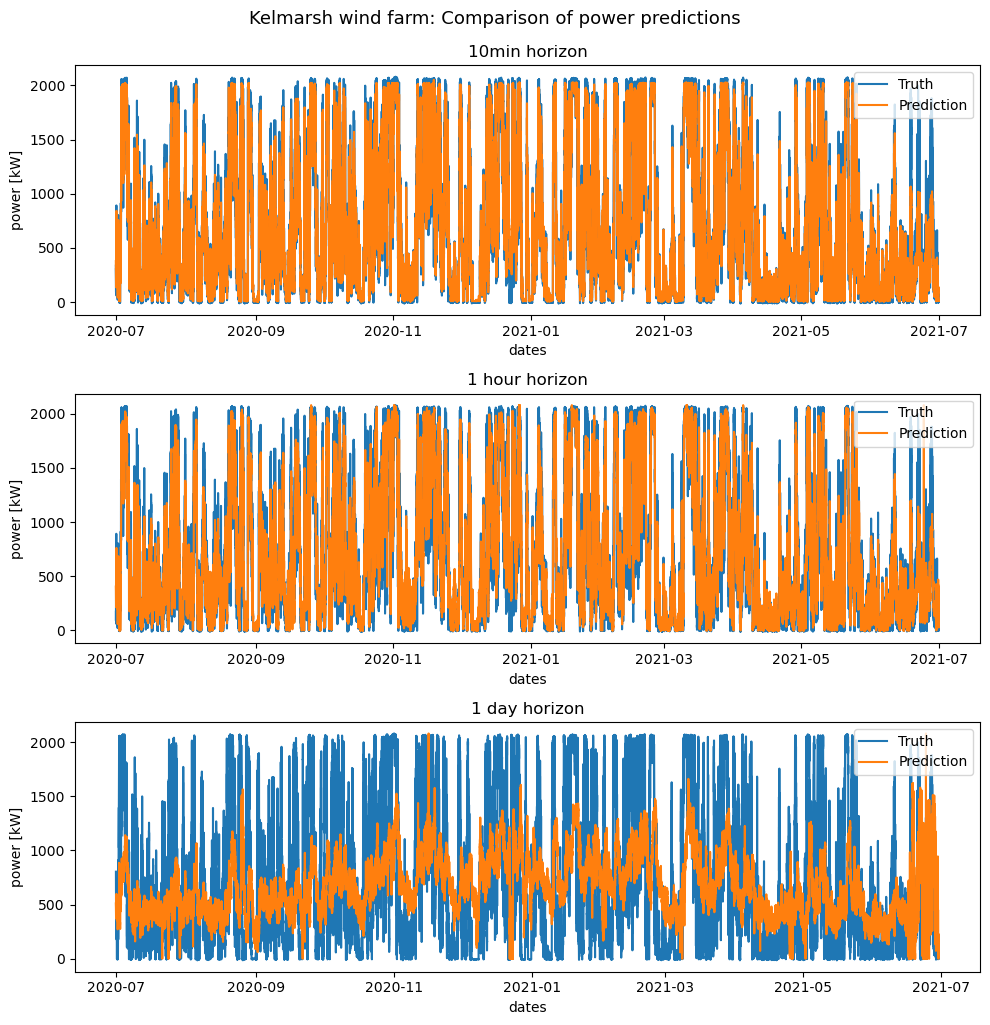

In [ ]:
visualizations.plot_models("Kelmarsh",models)
